<a href="https://colab.research.google.com/github/ActiveStacks/DatasetTwo/blob/main/Final1_EXPERIMENT_BERTLLM_1E8ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix
import torch
from sklearn.model_selection import train_test_split

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
    # QARK: Quick Android Review Kit (Vulnerability Scanner)
    # QARK SCANNED DATASET
# path1 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_Qark_Processed.csv')
# path2 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_Qark_Processed.csv')
#path3 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_Qark_Processed.csv')


    # MOBSF: Mobile Security Framework (Vulnerability Scanner)
    # MOBSF SCANNED DATASET
# path4 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_MobSF_Processed.csv')
# path5 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_MobSF_Processed.csv')
# path6 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_MobSF_Processed.csv')

    # COMBINED DATASET
# path7 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_Combined_Processed.csv')
path8 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_Combined_Processed.csv')
# path9 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_Combined_Processed.csv')

In [66]:
df = pd.read_csv(path8)

<ipython-input-66-cef7133f957d>:1: DtypeWarning: Columns (1,2,3,5,6,10,11,12,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path8)


In [67]:
df.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,0,NaN,NaN,NaN,package a.t.a.a;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package a.t.a.a;,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,import a.h.b.e;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.h.b.e;,NaN,NaN,NaN
3,3,NaN,NaN,NaN,import a.h.c.a.h;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.h.c.a.h;,NaN,NaN,NaN
4,4,NaN,NaN,NaN,import a.t.a.a.g;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.t.a.a.g;,NaN,NaN,NaN


In [68]:
df.dropna()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name


In [69]:
df.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,0,NaN,NaN,NaN,package a.t.a.a;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package a.t.a.a;,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,import a.h.b.e;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.h.b.e;,NaN,NaN,NaN
3,3,NaN,NaN,NaN,import a.h.c.a.h;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.h.c.a.h;,NaN,NaN,NaN
4,4,NaN,NaN,NaN,import a.t.a.a.g;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.t.a.a.g;,NaN,NaN,NaN


In [70]:
df.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
4490937,4680272,NaN,NaN,NaN,this.zzq = bl;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,this.zzq = bl;,NaN,NaN,NaN
4490938,4680273,NaN,NaN,NaN,this.zzr = string2;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,this.zzr = string2;,NaN,NaN,NaN
4490939,4680274,NaN,NaN,NaN,this.zzs = zze2;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,this.zzs = zze2;,NaN,NaN,NaN
4490940,4680275,NaN,NaN,NaN,private CellResolution parseCellResolution(Xml...,NaN,NaN,NaN,CWE-312,Cleartext Storage of Sensitive Information,NaN,NaN,NaN,1,private CellResolution parseCellResolution(Xml...,file,INFO,Hardcoded HTTP url found
4490941,4680276,NaN,NaN,NaN,"Log.i(DcHelper.TAG, ""opening of external activ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"Log.i(DcHelper.TAG, ""user_str"", (Throwable)ex);",NaN,NaN,NaN


In [71]:
df.shape

(4490942, 18)

In [72]:
df.describe()

,index,CVSS,Vulnerability_status
count,4.490942e+06,28221.000000,4.490942e+06
mean,2.301414e+06,6.993714,1.110079e-02
std,1.356250e+06,1.352684,1.047739e-01
min,0.000000e+00,0.000000,0.000000e+00
25%,1.122735e+06,7.500000,0.000000e+00
50%,2.270972e+06,7.500000,0.000000e+00
75%,3.479106e+06,7.500000,0.000000e+00
max,4.680276e+06,8.800000,1.000000e+00


In [73]:
df.columns

Index(['index', 'Description', 'Type', 'Pattern', 'Code', 'Severity',
       'Input Case', 'CVSS', 'CWE_ID', 'CWE_Desc', 'OWASP_Mobile',
       'OWSAP_MASVS', 'Reference', 'Vulnerability_status', 'processed_code',
       'category', 'severity', 'qark_name'],
      dtype='object')

In [74]:
df.nunique()

,0
index,4490942
Description,24
Type,4
Pattern,24
Code,4466913
Severity,4
Input Case,2
CVSS,9
CWE_ID,22
CWE_Desc,23


In [75]:
df['Vulnerability_status'].unique()

array([0, 1])

In [76]:
print(df['Vulnerability_status'].value_counts())

Vulnerability_status
0    4441089
1      49853
Name: count, dtype: int64


In [77]:
df_safe = df[df['Vulnerability_status']==0]

In [78]:
df_vulnerable = df[df['Vulnerability_status']==1]

In [79]:
df_safe.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,0,NaN,NaN,NaN,package a.t.a.a;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package a.t.a.a;,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,import a.h.b.e;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.h.b.e;,NaN,NaN,NaN
3,3,NaN,NaN,NaN,import a.h.c.a.h;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.h.c.a.h;,NaN,NaN,NaN
4,4,NaN,NaN,NaN,import a.t.a.a.g;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.t.a.a.g;,NaN,NaN,NaN


In [80]:
df_safe.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
4490936,4680271,NaN,NaN,NaN,"zzd(boolean bl, String string2, zze zze2) {",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"zzd(boolean bl, String string2, zze zze2) {",NaN,NaN,NaN
4490937,4680272,NaN,NaN,NaN,this.zzq = bl;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,this.zzq = bl;,NaN,NaN,NaN
4490938,4680273,NaN,NaN,NaN,this.zzr = string2;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,this.zzr = string2;,NaN,NaN,NaN
4490939,4680274,NaN,NaN,NaN,this.zzs = zze2;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,this.zzs = zze2;,NaN,NaN,NaN
4490941,4680276,NaN,NaN,NaN,"Log.i(DcHelper.TAG, ""opening of external activ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"Log.i(DcHelper.TAG, ""user_str"", (Throwable)ex);",NaN,NaN,NaN


In [81]:
df_vulnerable.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
175,175,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.e(""VectorDrawableCompat"", ""parser error"", ...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(""user_str"", ""user_str"", e4);",NaN,NaN,NaN
567,567,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.w(y, ""Compatibility shadow requested but c...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.w(y, ""user_str"");",NaN,NaN,NaN
1220,1220,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.e(""CSLCompat"", ""Failed to inflate ColorSta...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(""user_str"", ""user_str"", e2);",NaN,NaN,NaN
1473,1473,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.v(""FragmentManager"", g.toString());",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.v(""user_str"", g.toString());",NaN,NaN,NaN
1550,1550,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.e(""TypefaceCompatApi21Impl"", e2.getClass()...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(""user_str"", e2.getClass().getName(), e2);",NaN,NaN,NaN


In [82]:
df_vulnerable.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
4490135,4679467,NaN,NaN,NaN,"Log.w(NotificationCenter.TAG, (Throwable)o);",NaN,NaN,NaN,CWE-532,Insertion of Sensitive Information into Log File,NaN,NaN,NaN,1,"Log.w(NotificationCenter.TAG, (Throwable)o);",file,WARNING,Logging found
4490635,4679969,NaN,NaN,NaN,"Log.d((String)string2, (String)this.zzh(string...",NaN,NaN,NaN,CWE-532,Insertion of Sensitive Information into Log File,NaN,NaN,NaN,1,"Log.d((String)string2, (String)this.zzh(string...",file,WARNING,Logging found
4490900,4680235,NaN,NaN,NaN,"Log.w(""GoogleApiAvailability"", concat2);",NaN,NaN,NaN,CWE-532,Insertion of Sensitive Information into Log File,NaN,NaN,NaN,1,"Log.w(""user_str"", concat2);",file,WARNING,Logging found
4490934,4680269,NaN,NaN,NaN,public static <TResult> Task<TResult> call(fin...,NaN,NaN,NaN,CWE-676,Use of Potentially Dangerous Function,NaN,NaN,NaN,1,public static <TResult> Task<TResult> call(fin...,file,WARNING,Insecure functions found
4490940,4680275,NaN,NaN,NaN,private CellResolution parseCellResolution(Xml...,NaN,NaN,NaN,CWE-312,Cleartext Storage of Sensitive Information,NaN,NaN,NaN,1,private CellResolution parseCellResolution(Xml...,file,INFO,Hardcoded HTTP url found


In [83]:
# DATA IMBALANCE CORRECTION VIA RANDOM UNDERSAMPLING OF MAJORITY DATA

In [84]:
df_safe_sampled = df_safe.sample(len(df_vulnerable), random_state = 42)

In [85]:
df_balanced = pd.concat([df_safe_sampled, df_vulnerable])

In [86]:
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

In [87]:
print(df_balanced['Vulnerability_status'].value_counts())

Vulnerability_status
1    49853
0    49853
Name: count, dtype: int64


In [88]:
print(df_balanced.value_counts())

Series([], Name: count, dtype: int64)


<Axes: >

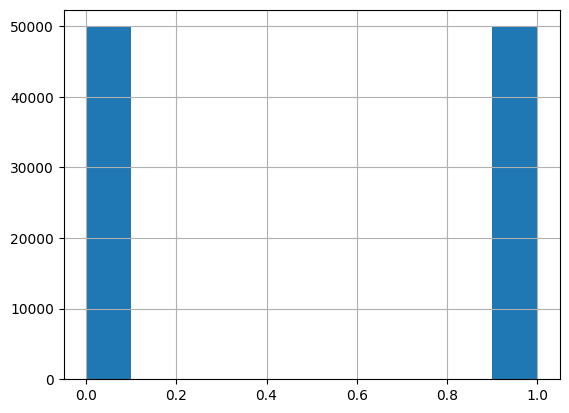

In [89]:
df_balanced['Vulnerability_status'].hist()

In [90]:
df_balanced.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,2974041,NaN,NaN,NaN,object = (Element)this.waypoints.item(n3);,NaN,NaN,NaN,CWE-312,Cleartext Storage of Sensitive Information,NaN,NaN,NaN,1,object = (Element)this.waypoints.item(n3);,file,INFO,Hardcoded HTTP url found
1,2320470,NaN,NaN,NaN,"public static void setPublisher(XMPMeta var0, ...",NaN,NaN,NaN,CWE-312,Cleartext Storage of Sensitive Information,NaN,NaN,NaN,1,"public static void setPublisher(XMPMeta var0, ...",file,INFO,Hardcoded HTTP url found
2,650064,NaN,NaN,NaN,h hVar = fragment.w;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,h hVar = fragment.w;,NaN,NaN,NaN
3,672784,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.e(""RuntimeTypeAdapter"", ""cannot deserializ...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(""user_str"", ""user_str"" + RuntimeTypeAdap...",NaN,NaN,NaN
4,1417338,Files may contain hardcoded sensitive informat...,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",private static final String STATIC_INIT_CLASSE...,warning,lower,7.4,CWE-312,Cleartext Storage of Sensitive Information,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,private static final String STATIC_INIT_CLASSE...,NaN,NaN,NaN


In [91]:
df_balanced.drop(['Severity', 'Description','Code', 'CWE_ID','CWE_Desc'], axis=1, inplace=True)

In [92]:
df_balanced.head(10)

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,2974041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,object = (Element)this.waypoints.item(n3);,file,INFO,Hardcoded HTTP url found
1,2320470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"public static void setPublisher(XMPMeta var0, ...",file,INFO,Hardcoded HTTP url found
2,650064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,h hVar = fragment.w;,NaN,NaN,NaN
3,672784,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(""user_str"", ""user_str"" + RuntimeTypeAdap...",NaN,NaN,NaN
4,1417338,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",lower,7.4,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,private static final String STATIC_INIT_CLASSE...,NaN,NaN,NaN
5,1759175,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.d(SQLiteStore.TAG, ""user_str"" + (DroidShow...",NaN,NaN,NaN
6,1443557,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(f1122a, a(str, objArr), th);",NaN,NaN,NaN
7,3700979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"writer.write(""<?xml version=\""1.0\"" encoding=\...",file,INFO,Hardcoded HTTP url found
8,2660022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,final float n18 = n14 / n12 / (n15 / n12);,NaN,NaN,NaN
9,2851741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"var1.append(""<tr class=\""header\"">"");",NaN,NaN,NaN


In [93]:
df_balanced.tail(10)

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
99696,708737,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.v(""user_str"", ""user_str"" + this.f2649b.e(i...",NaN,NaN,NaN
99697,1754892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,String theString2 = aCommand.substring(15);,NaN,NaN,NaN
99698,3118691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Log.w(""user_str"", ""user_str"" + var6.getKey());",file,WARNING,Logging found
99699,4429800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,sb2.append(url.getHost());,NaN,NaN,NaN
99700,2553959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,(this.lizenz = this.findViewById(2131230872))....,file,INFO,Hardcoded HTTP url found
99701,3861512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,public float field_6561 = 0.5F;,NaN,NaN,NaN
99702,308820,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.w(EqualizerFragment.TAG, ""user_str"", e);",NaN,NaN,NaN
99703,1831593,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.i(obj2 + ""user_str"" + spanStart4 + ""user_s...",NaN,NaN,NaN
99704,2873418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,return j.a(n);,NaN,NaN,NaN
99705,140513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"TypedArray s = a.e.d.c.g.s(resources, theme, a...",NaN,NaN,NaN


In [94]:
df_balanced.dropna()

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name


In [95]:
df_balanced = df_balanced[['processed_code', 'Vulnerability_status']]

In [96]:
df_balanced.head()

,processed_code,Vulnerability_status
0,object = (Element)this.waypoints.item(n3);,1
1,"public static void setPublisher(XMPMeta var0, ...",1
2,h hVar = fragment.w;,0
3,"Log.e(""user_str"", ""user_str"" + RuntimeTypeAdap...",1
4,private static final String STATIC_INIT_CLASSE...,1


In [97]:
df_balanced.columns = ['text', 'labels']

In [98]:
df_balanced.head(5)

,text,labels
0,object = (Element)this.waypoints.item(n3);,1
1,"public static void setPublisher(XMPMeta var0, ...",1
2,h hVar = fragment.w;,0
3,"Log.e(""user_str"", ""user_str"" + RuntimeTypeAdap...",1
4,private static final String STATIC_INIT_CLASSE...,1


In [99]:
df_balanced.head(5)

,text,labels
0,object = (Element)this.waypoints.item(n3);,1
1,"public static void setPublisher(XMPMeta var0, ...",1
2,h hVar = fragment.w;,0
3,"Log.e(""user_str"", ""user_str"" + RuntimeTypeAdap...",1
4,private static final String STATIC_INIT_CLASSE...,1


In [100]:
df_balanced.to_csv('processed_dataset.csv', index=False)

In [101]:
!pip install datasets

In [102]:
from datasets import load_dataset, DatasetDict

In [103]:
codes_dataset = load_dataset('csv', data_files='processed_dataset.csv')

Generating train split: 0 examples [00:00, ? examples/s]

In [104]:
codes_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 99706
    })
})

In [105]:
# from posixpath import split
train_testvalid = codes_dataset['train'].train_test_split(test_size=0.4, seed=42)
test_valid = train_testvalid['test'].train_test_split(test_size=0.5)


In [106]:
split_dataset = DatasetDict(
    {
        'train': train_testvalid['train'],
        'test' : test_valid['test'],
        'valid': test_valid['train']
    }
)

In [107]:
split_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 59823
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 19942
    })
    valid: Dataset({
        features: ['text', 'labels'],
        num_rows: 19941
    })
})

In [108]:
from transformers import AutoTokenizer
checkpoint = "google-bert/bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [109]:
def tokenize_function(sets):
  return tokenizer(sets['text'], truncation=True, padding=True)

In [110]:
def tokenize_function(sets):
  if isinstance(sets['text'], list):
    sets['text'] =[str(text) for text in sets['text']]
  else:
      sets['text'] = str(sets['text'])
  return tokenizer(sets['text'],padding='max_length', truncation=True, max_length=512, return_tensors='pt')

In [111]:
tokenized_datasets = split_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/59823 [00:00<?, ? examples/s]

Map:   0%|          | 0/19942 [00:00<?, ? examples/s]

Map:   0%|          | 0/19941 [00:00<?, ? examples/s]

In [112]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [113]:
!pip install torchinfo

In [114]:
from torchinfo import summary

In [115]:
summary(model)

Layer (type:depth-idx)                                       Param #
BertForSequenceClassification                                --
├─BertModel: 1-1                                             --
│    └─BertEmbeddings: 2-1                                   --
│    │    └─Embedding: 3-1                                   23,440,896
│    │    └─Embedding: 3-2                                   393,216
│    │    └─Embedding: 3-3                                   1,536
│    │    └─LayerNorm: 3-4                                   1,536
│    │    └─Dropout: 3-5                                     --
│    └─BertEncoder: 2-2                                      --
│    │    └─ModuleList: 3-6                                  85,054,464
│    └─BertPooler: 2-3                                       --
│    │    └─Linear: 3-7                                      590,592
│    │    └─Tanh: 3-8                                        --
├─Dropout: 1-2                                               --
├─L

In [116]:
training_args = TrainingArguments(output_dir='training_dir',
                                  evaluation_strategy='epoch',
                                   save_strategy='epoch',
                                  num_train_epochs=4,
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=64,
                                  )

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [117]:
# def compute_metrics(logits_and_labels):
#   logits, labels = logits_and_labels
#   predictions = np.argmax(logits, axis=-1)
#   acc=np.mean(predictions == labels)
#   f1 = f1_score(labels, predictions, average = 'binary')
#   recalls = recall_score(labels, predictions, average = 'binary')
#   precisions = precision_score(labels, predictions, average = "binary")
#   return {'accuracy' : acc, 'recall' : recalls, 'precision' : precisions, 'f1':f1, }

In [118]:
!pip install evaluate

In [119]:
import evaluate

In [120]:

def compute_metrics(eval_pred):
  prec = evaluate.load("precision")
  rec = evaluate.load("recall")
  f1c = evaluate.load("f1")
  acc = evaluate.load("accuracy")
  logits, labels = eval_pred
  predictions = np.argmax(logits, axis=-1)

  precisions=prec.compute(predictions=predictions, references=labels)
  recalls=rec.compute(predictions=predictions, references=labels)
  f1s=f1c.compute(predictions=predictions, references=labels)
  accs = acc.compute(predictions=predictions, references=labels)

  return {'accuracy' : accs, 'recall' : recalls, 'precision' : precisions, 'f1':f1s, }





In [121]:
trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=tokenized_datasets['train'],
                  eval_dataset=tokenized_datasets['valid'],
                  tokenizer=tokenizer,
                  compute_metrics=compute_metrics)

<ipython-input-121-5bb568b18981>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model,


In [122]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
1,0.143500,0.122798,{'accuracy': 0.9647460007020711},{'recall': 0.9528696691909128},{'precision': 0.9765138364137649},{'f1': 0.9645468757879873}
2,0.119600,0.133042,{'accuracy': 0.9666014743493305},{'recall': 0.9595456357114388},{'precision': 0.9737108190091001},{'f1': 0.966576332429991}
3,0.100100,0.135874,{'accuracy': 0.9716664159269846},{'recall': 0.964826624153049},{'precision': 0.9785750378979282},{'f1': 0.9716522000903116}
4,0.062300,0.131347,{'accuracy': 0.9713153803720976},{'recall': 0.968513351933041},{'precision': 0.9743384121892542},{'f1': 0.9714171497101739}


Trainer is attempting to log a value of "{'accuracy': 0.9647460007020711}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'recall': 0.9528696691909128}" of type <class 'dict'> for key "eval/recall" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'precision': 0.9765138364137649}" of type <class 'dict'> for key "eval/precision" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.9645468757879873}" of type <class 'dict'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.9666014743493305}" of type <class 

TrainOutput(global_step=14956, training_loss=0.10871924471491701, metrics={'train_runtime': 5405.7507, 'train_samples_per_second': 44.266, 'train_steps_per_second': 2.767, 'total_flos': 6.296037065920512e+16, 'train_loss': 0.10871924471491701, 'epoch': 4.0})

In [123]:
outcome= trainer.predict(tokenized_datasets['test'])

In [124]:
print(outcome.metrics)

{'test_loss': 0.14213232696056366, 'test_accuracy': {'accuracy': 0.9688596931100191}, 'test_recall': {'recall': 0.9687123947051745}, 'test_precision': {'precision': 0.9690039121275955}, 'test_f1': {'f1': 0.9688581314878892}, 'test_runtime': 135.8333, 'test_samples_per_second': 146.812, 'test_steps_per_second': 2.297}
